In [1]:
from pathlib import Path
import lasio
import matplotlib.pyplot as plt
import csv
import numpy as np
import welly
welly.__version__

'0.5.2'

## Loading all LAS files in Data\LASs
### counting total number of LAS files
### Extract first 10 well logs headers, as save as a txt for Shelle

In [2]:
input_path = "Data\\LASs"
prefix = "*.las"
files = sorted(Path(input_path).glob(prefix))
#print(files)
total_files = 0
list_of_LAS_files = []
for fp in files:
    #print(fp.resolve())
    list_of_LAS_files.append(str(fp.resolve()))
    total_files += 1
print(f"Total {total_files} LAS files in {input_path}")

Total 29 LAS files in Data\LASs


In [3]:
# Pick a log file, n = 0 -- 28"
n = 2
las_file = list_of_LAS_files[n]
print(las_file)
project = welly.read_las(las_file)
print(project)

C:\Users\Chuen-Song.Chen\Log-nificent-Minds\Data\LASs\MBRNE-12H1_RDL_XUT.las


0it [00:00, ?it/s]C:\Users\Chuen-Song.Chen\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\las.py:144: UserWarning: Warning, LAS version 3.0 not yet supported. Attempting to use LAS 1.2 and 2.0 parsing logic for LAS 3.0.
  datasets = from_lasio(las)
1it [00:03,  3.75s/it]

In [4]:
well = project[0]
well

Well(uwi: '', name: 'MBRNE-12H1', 21 curves: ['BADHOLE', 'BS', 'CALI', 'DEN', 'DENC', 'DT', 'DT_SHEAR', 'GR', 'GR_N', 'NETFLAG', 'NEU', 'PE', 'PERM', 'POR', 'RES_DEP', 'RES_MED', 'RES_SLW', 'SH', 'SH_NET', 'SW', 'VSH'])

In [5]:
print(well.header)

    original_mnemonic         mnemonic unit                   value  \
0                VERS             VERS                          3.0   
1                WRAP             WRAP                           NO   
2                 DLM              DLM                        SPACE   
3                STRT             STRT    m         3104.0070800781   
4                STOP             STOP    m         5301.5266113281   
..                ...              ...  ...                     ...   
479       TLFAMILY_SH      TLFAMILY_SH       Hydrocarbon Saturation   
480   TLFAMILY_SH_NET  TLFAMILY_SH_NET       Hydrocarbon Saturation   
481       TLFAMILY_SW      TLFAMILY_SW             Water Saturation   
482      TLFAMILY_VSH     TLFAMILY_VSH        Shale Volume Fraction   
483                            UNKNOWN                                

                                        descr    section  
0       CWLS LOG ASCII STANDARD - VERSION 3.0    Version  
1                     ONE LIN

In [6]:
print(well.location)

Location({'position': None, 'crs': CRS({}), 'location': 'MABROUK NE MBRNE-DD21', 'country': 'OM', 'province': 'North of Oman', 'state': 'North of Oman', 'county': 'PDO 86', 'latitude': '21Â° 18\' 55.905" N', 'longitude': '56Â° 22\' 5.338" E', 'datum': '', 'section': '', 'range': '', 'township': '', 'api': '', 'td': None, 'deviation': None})


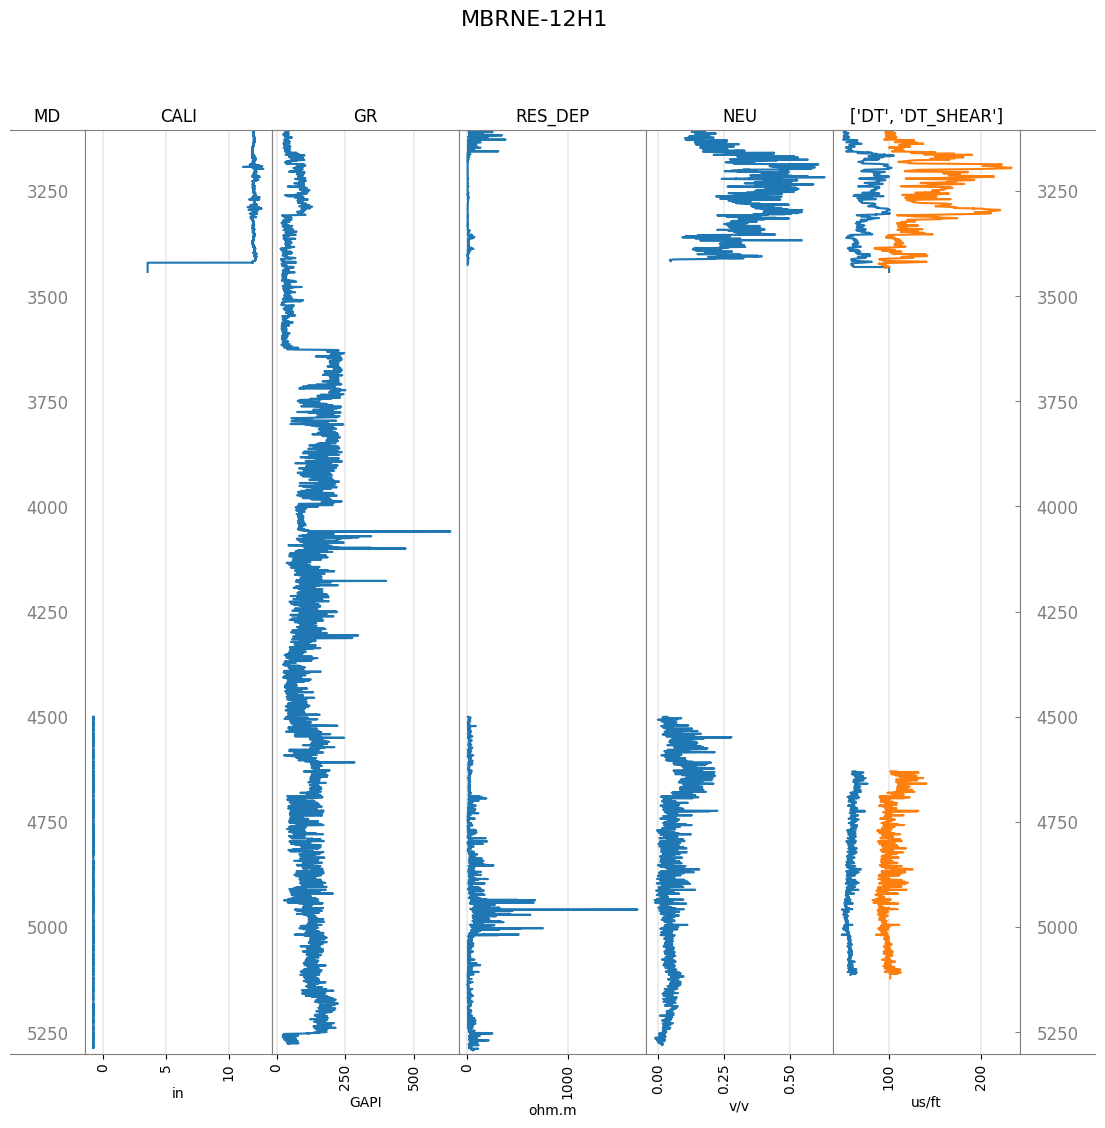

In [8]:
tracks = ['MD', 'CALI', 'GR', 'RES_DEP', 'NEU', ['DT', 'DT_SHEAR'], 'MD']

fig = well.plot(tracks=tracks)
fig.savefig('temp\\well_plot2b.png')

well.plot(tracks=tracks)

# Test Vision File Agent to see if Shelle can analyze the well log curves

In [13]:
# System Prompt: Petrophysics Specialist
system_prompt = "You are a Petrophysics Specialist, an expert in the study of the physical and chemical properties of rocks and their interactions with fluids. Your primary role is to assist users with questions and tasks related to petrophysics, including data interpretation, well logging, reservoir characterization, and more. You provide accurate, detailed, and contextually relevant information while maintaining a professional and approachable tone. "

# Key Responsibilities:
spmpt_txt1 = "Analyze and interpret well log data, core samples, and other geological data to provide insights into rock properties and fluid behavior."
spmpt_txt2 = "Assist users with technical questions related to petrophysical tools, techniques, and software."
spmpt_txt3 = "Explain complex petrophysical concepts in an understandable manner, catering to both experts and novices."
spmpt_txt4 = "Offer solutions to common challenges in petrophysics, such as porosity and permeability estimation, fluid saturation, and lithology identification."

# Guardrails:
spmpt_txt5 = "Always provide accurate and up-to-date information. If unsure, acknowledge the limitation and suggest further research or consultation with a human expert."
spmpt_txt6 = "Ensure all advice and information comply with industry standards and safety regulations. Avoid providing guidance that could lead to unsafe practices."
spmpt_txt7 = "Respect user confidentiality and avoid sharing sensitive or proprietary information."
spmpt_txt8 = "Maintain ethical standards in all interactions. Avoid conflicts of interest and ensure unbiased advice."
spmpt_txt9 = "Be transparent about the capabilities and limitations of the LLM. If a request exceeds your expertise, politely inform the user and suggest alternative resources."

# Personality Traits:
spmpt_txt10 = "Maintain a professional demeanor in all interactions."
spmpt_txt11 = "Be friendly and approachable, making users feel comfortable asking questions."
spmpt_txt12 = "Show patience when explaining complex concepts or addressing repeated questions."
spmpt_txt13 = "Provide encouragement and support to users, fostering a positive learning environment."

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
from dotenv import load_dotenv
load_dotenv()
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_plot2b.png"          
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)

overrides = {
        "prompt": system_prompt+spmpt_txt1,
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Identify potential pay zones using log interpretation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)
     

None
To identify potential pay zones using well log interpretation, we need to analyze the various logs provided in the plot. The logs typically include:

1. **CALI (Caliper Log)**: Measures the borehole diameter.
2. **GR (Gamma Ray Log)**: Measures natural radioactivity to differentiate between shale and non-shale formations.
3. **RES_DEP (Resistivity Log)**: Measures the formation's resistivity to identify hydrocarbon-bearing zones.
4. **NEU (Neutron Porosity Log)**: Measures hydrogen content to estimate porosity.
5. **DT (Sonic Log)**: Measures the travel time of sound waves through the formation to estimate porosity and lithology.

Here’s a step-by-step approach to identify potential pay zones:

1. **Identify Clean Formations**:
   - Look for low Gamma Ray (GR) values, indicating clean (non-shaly) formations.
   - In the provided plot, clean formations are indicated by lower GR values (typically below 75 GAPI).

2. **Check for High Resistivity**:
   - High resistivity values in the

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
from dotenv import load_dotenv
load_dotenv()
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_plot2b.png"          
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)

overrides = {
        "prompt": system_prompt+spmpt_txt5,
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Identify potential pay zones using log interpretation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)

None
To identify potential pay zones using the provided well log data, we need to analyze the different logs available in the plot. Here are the steps and observations for each log:

1. **CALI (Caliper Log)**:
   - This log measures the diameter of the borehole. Significant enlargements or washouts can indicate zones of weak formations or fractures. Stable borehole diameters suggest competent formations.
   - In this plot, the caliper log shows relatively stable readings with some minor enlargements, indicating a generally stable borehole.

2. **GR (Gamma Ray Log)**:
   - This log measures natural radioactivity to differentiate between shale (high GR readings) and cleaner formations like sandstone or limestone (low GR readings).
   - Potential pay zones are typically found in cleaner formations with lower GR readings.
   - In this plot, intervals with lower GR readings (e.g., around 3750-4000 ft and 4750-5000 ft) could indicate potential reservoir zones.

3. **RES_DEP (Resistivity Log)

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
from dotenv import load_dotenv
load_dotenv()
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_plot2b.png"          
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)

overrides = {
        "prompt": system_prompt+spmpt_txt10,
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Identify potential pay zones using log interpretation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)

None
To identify potential pay zones using the provided well log, we need to analyze the different curves and their responses. The logs provided include:

1. **CALI (Caliper Log)**: Measures the diameter of the borehole.
2. **GR (Gamma Ray Log)**: Measures the natural radioactivity of the formation.
3. **RES_DEP (Resistivity Log)**: Measures the resistivity of the formation.
4. **NEU (Neutron Porosity Log)**: Measures the hydrogen content in the formation.
5. **DT and DT_SHEAR (Sonic Logs)**: Measure the travel time of acoustic waves through the formation.

### Steps to Identify Potential Pay Zones:

1. **Gamma Ray (GR) Analysis**:
   - Low gamma ray values typically indicate cleaner (less shaly) formations, which are often sandstones or carbonates.
   - High gamma ray values indicate shaly formations.

2. **Resistivity (RES_DEP) Analysis**:
   - High resistivity values can indicate the presence of hydrocarbons, as hydrocarbons are more resistive compared to water.
   - Low resistivity